In [10]:
import os
import pandas as pd
import numpy as np
import math
import time
from mpl_toolkits.mplot3d import Axes3D
import matplotlib
import matplotlib.pyplot as plt

In [11]:
#Reading the files
dfx = pd.read_csv('q4x.dat', delimiter='\s', dtype='float64')
dfy = pd.read_csv('q4y.dat')

#Normalising the data
x = dfx.to_numpy()
m = dfx.shape[0]
x_normed = (x - x.mean(axis=0)) / x.std(axis=0)
y = dfy.to_numpy()
xy = np.append(x_normed, y, axis=1)
xy = np.delete(xy, 1, 1)
xy0 = xy[np.where(xy[:, 2]=='Alaska')]
xy1 = xy[np.where(xy[:, 2]=='Canada')]
x0 = np.delete(xy0, 2, axis=1)
x1 = np.delete(xy1, 2, axis=1)

#Finding Mu and Sigma for linear boundary case
mu0 = np.mean(x0, axis=0)
mu1 = np.mean(x1, axis=0)
print(mu0)
print(mu1)

c0 = x0-mu0
c1 = x1-mu1
sigma0 = np.array(((np.transpose(c0)).dot(c0))/(m/2), dtype='float64')
sigma1 = np.array(((np.transpose(c1)).dot(c1))/(m/2), dtype='float64')
sigma = np.array((sigma0+sigma1)/2, dtype='float64')
print(sigma)

[-0.7552943279913609 0.685094305548928]
[0.7552943279913608 -0.6850943055489274]
[[ 0.42953048 -0.02247228]
 [-0.02247228  0.53064579]]


C:\Users\samra\AppData\Local\Temp\ipykernel_13396\1605241159.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  dfx = pd.read_csv('q4x.dat', delimiter='\s', dtype='float64')


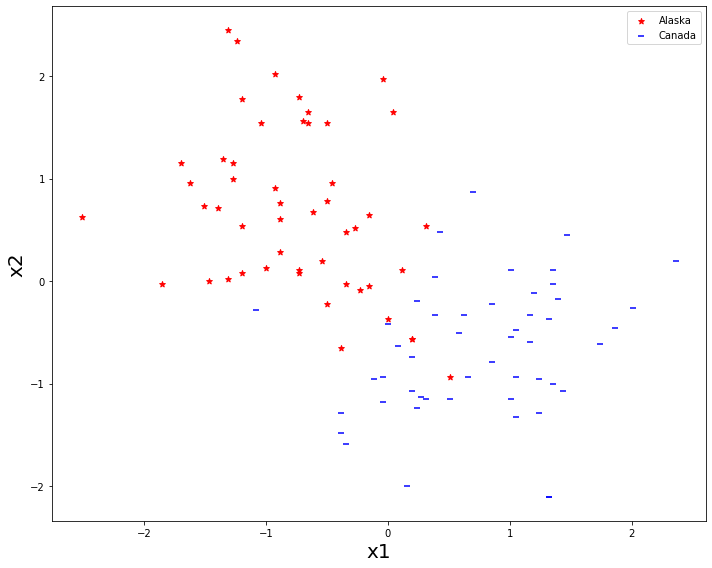

In [12]:
#Plotting the data
plt.rcParams["figure.figsize"] = [10, 8]
plt.rcParams["figure.autolayout"] = True
plt.scatter(x0[:, 0], x0[:, 1], c='red', marker='*', label='Alaska')
plt.scatter(x1[:, 0], x1[:, 1], c='blue', marker='_', label='Canada')
plt.xlabel('x1', fontsize=20)
plt.ylabel('x2', fontsize=20)
plt.legend()
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:2475: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  xys = np.asarray(xys)


TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

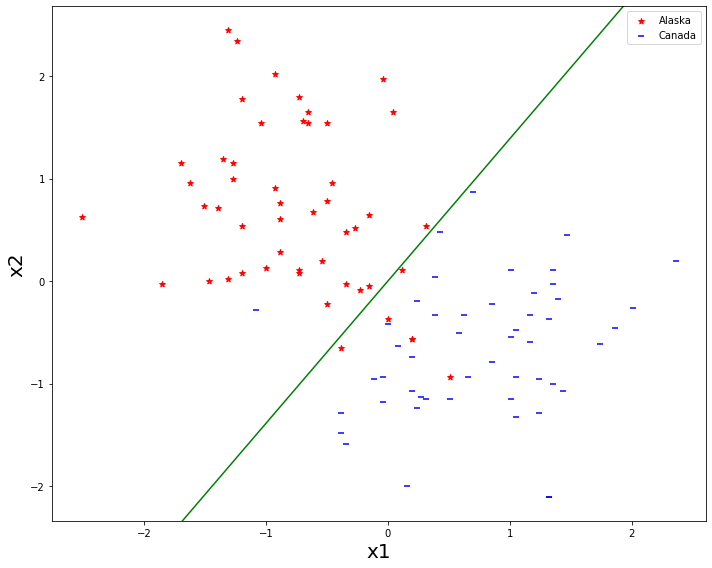

In [13]:
#Plotting the data and the linear boundary
def linearboundary():
    #Calculations for the linear boundary
    sigma_inverse = np.linalg.inv(sigma)
    temp1 = 2*(mu1-mu0).dot(sigma_inverse)
    sl = -temp1[0]/temp1[1]
    mu0T = mu0[..., None]
    mu1T = mu1[..., None]
    temp2 = mu0.dot(sigma_inverse).dot(mu0T) - mu1.dot(sigma_inverse).dot(mu1T)
    intercept = -temp2/temp1[1]
    s.append(sl)
    s.append(intercept)
    
    plt.rcParams["figure.figsize"] = [10, 8]
    plt.rcParams["figure.autolayout"] = True
    plt.scatter(x0[:, 0], x0[:, 1], c='red', marker='*', label='Alaska')
    plt.scatter(x1[:, 0], x1[:, 1], c='blue', marker='_', label='Canada')
    plt.xlabel('x1', fontsize=20)
    plt.ylabel('x2', fontsize=20)
    plt.legend()
    plt.axline((0, intercept), slope=sl, c='green')
    plt.show()

s = []
linearboundary()

In [14]:
#Printing the Mu and Sigma for the quadratic boundary case
print(mu0)
print(mu1)
print(sigma0)
print(sigma1)

[-0.7552943279913609 0.685094305548928]
[0.7552943279913608 -0.6850943055489274]
[[ 0.38158978 -0.15486516]
 [-0.15486516  0.64773717]]
[[0.47747117 0.1099206 ]
 [0.1099206  0.41355441]]


C:\Users\samra\AppData\Local\Temp\ipykernel_13396\2419306535.py:12: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  coef = np.array([theta2[0][0], theta2[0][1], theta2[1][1], theta1[0][0], theta1[1][0], theta0])


TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

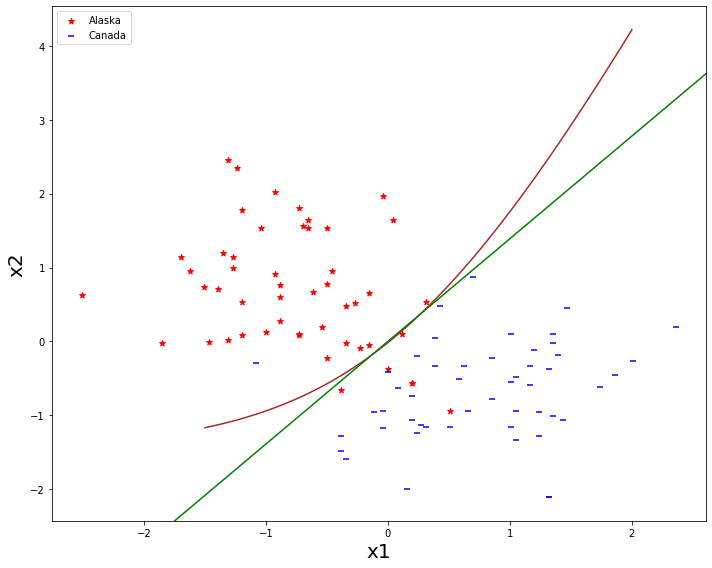

In [15]:
#Plotting the data, the linear boundary and the quadratic boundary
def quadraticboundary():
    #Calculations for the quadratic boundary
    sigma0_inverse = np.linalg.inv(sigma0)
    sigma1_inverse = np.linalg.inv(sigma1)
    mu0T = mu0[..., None]
    mu1T = mu1[..., None]
    
    theta2 = sigma1_inverse - sigma0_inverse
    theta1 = (2 * sigma0_inverse).dot(mu0T) - (2 * sigma1_inverse).dot(mu1T) 
    theta0 = -(mu0).dot(sigma0_inverse).dot(mu0T) + (mu1).dot(sigma1_inverse).dot(mu1T) + mu0.dot(sigma0_inverse).dot(mu0T) - mu1.dot(sigma1_inverse).dot(mu1T) - np.log(np.linalg.det(sigma0_inverse))/2 + np.log(np.linalg.det(sigma1_inverse))/2
    coef = np.array([theta2[0][0], theta2[0][1], theta2[1][1], theta1[0][0], theta1[1][0], theta0])
    
    yplot = list()
    xplot = list()
    x = np.linspace(-1.5,2,100)
    for i in x:
        c1 = coef[0]*i*i + coef[3]*i + coef[5]
        b1 = 2*coef[1]*i + coef[4]
        a1 = coef[2]
        xplot.append(i)
        yplot.append((-1*b1 + ((b1*b1 - 4*a1*c1)**(1/2)))/(2*a1))

    plt.rcParams["figure.figsize"] = [10, 8]
    plt.rcParams["figure.autolayout"] = True
    plt.scatter(x0[:, 0], x0[:, 1], c='red', marker='*', label='Alaska')
    plt.scatter(x1[:, 0], x1[:, 1], c='blue', marker='_', label='Canada')
    plt.xlabel('x1', fontsize=20)
    plt.ylabel('x2', fontsize=20)
    plt.plot(xplot, yplot, c='brown')
    plt.legend()
    plt.axline((0, s[1]), slope=s[0], c='green')
    plt.show()

quadraticboundary()